In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('./data/titanic.csv')
titanic['age'] = titanic['age'].replace(['?'], [None]).astype(float)
titanic['fare'] = titanic['fare'].replace(['?'], [None]).astype(float)

In [3]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?


In [4]:
def years_to_days(yrs):
    return yrs * 365

titanic["age"].apply(years_to_days)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [7]:
def age_group(age):
    if age < 2:
        return "infant"
    elif age < 12:
        return "child"
    elif age < 20:
        return "teen"
    elif age < 40:
        return "adult"
    elif age < 60:
        return "middle-aged"
    else:
        return "senior"

In [8]:
titanic["age"].apply(age_group)

0        adult
1       infant
2        child
3        adult
4        adult
         ...  
1304      teen
1305    senior
1306     adult
1307     adult
1308     adult
Name: age, Length: 1309, dtype: object

In [9]:
titanic["age_group"] = titanic["age"].apply(age_group)

In [10]:
titanic.age_group.value_counts()

age_group
adult          576
senior         303
middle-aged    205
teen           134
child           69
infant          22
Name: count, dtype: int64

In [28]:
titanic.groupby("age_group")["survived"].mean().sort_values()

age_group
senior         0.280528
adult          0.390625
middle-aged    0.409756
teen           0.410448
child          0.492754
infant         0.772727
Name: survived, dtype: float64

In [37]:
titanic.groupby(["age_group", "sex"])["survived"].mean().sort_values()

age_group    sex   
teen         male      0.109589
senior       male      0.135514
middle-aged  male      0.174242
adult        male      0.200000
child        male      0.472222
             female    0.515152
senior       female    0.629213
infant       male      0.692308
adult        female    0.746269
teen         female    0.770492
middle-aged  female    0.835616
infant       female    0.888889
Name: survived, dtype: float64

In [40]:
titanic["fare"]

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [41]:
titanic["fare"].apply(lambda x: f"${x*24}")

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [42]:
def convert_currency(num, multiplier):
    return f"${num * multiplier}"

In [43]:
titanic["fare"].apply(convert_currency, args=(24,))

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [44]:
df = titanic[["pclass", "survived", "age"]]

In [45]:
df

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,NaN
1306,3,0,26.5000
1307,3,0,27.0000


In [46]:
def get_range(s):
    return s.max() - s.min()

In [47]:
df.apply(get_range)

pclass       2.0000
survived     1.0000
age         79.8333
dtype: float64

In [48]:
df = titanic[["pclass", "survived", "age", "fare"]]
df.apply(get_range)

pclass        2.0000
survived      1.0000
age          79.8333
fare        512.3292
dtype: float64

In [49]:
df.apply(get_range, axis=1)

0       210.3375
1       150.6333
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.5000
1305     14.4542
1306     26.5000
1307     27.0000
1308     29.0000
Length: 1309, dtype: float64

In [50]:
def get_fam_size(s):
    fam_size = s.sibsp + s.parch
    if(fam_size == 0):
        return "solo"
    elif fam_size < 5:
        return "average"
    else:
        return "large"

In [51]:
titanic.apply(get_fam_size, axis=1)

0          solo
1       average
2       average
3       average
4       average
         ...   
1304    average
1305    average
1306       solo
1307       solo
1308       solo
Length: 1309, dtype: object

In [52]:
titanic["fam_size"] = titanic.apply(get_fam_size, axis=1)

In [53]:
titanic["fam_size"].value_counts()

fam_size
solo       790
average    459
large       60
Name: count, dtype: int64

In [54]:
titanic.groupby("fam_size")["survived"].mean()

fam_size
average    0.549020
large      0.150000
solo       0.302532
Name: survived, dtype: float64

In [58]:
titanic.groupby(["fam_size", "sex"]).survived.mean()

fam_size  sex   
average   female    0.771429
          male      0.294393
large     female    0.296296
          male      0.030303
solo      female    0.731959
          male      0.162752
Name: survived, dtype: float64

In [59]:
titanic.groupby(["fam_size", "pclass"]).survived.mean()

fam_size  pclass
average   1         0.726115
          2         0.593220
          3         0.369565
large     1         0.666667
          2         1.000000
          3         0.075472
solo      1         0.512500
          2         0.303797
          3         0.230932
Name: survived, dtype: float64

In [60]:
titanic.groupby(["fam_size", "sex", "pclass"]).survived.mean()

fam_size  sex     pclass
average   female  1         0.965909
                  2         0.904762
                  3         0.500000
          male    1         0.420290
                  2         0.236364
                  3         0.233333
large     female  1         1.000000
                  2         1.000000
                  3         0.136364
          male    1         0.000000
                  3         0.032258
solo      female  1         0.961538
                  2         0.857143
                  3         0.560000
          male    1         0.296296
                  2         0.103448
                  3         0.142473
Name: survived, dtype: float64

<Axes: xlabel='fam_size,sex,pclass'>

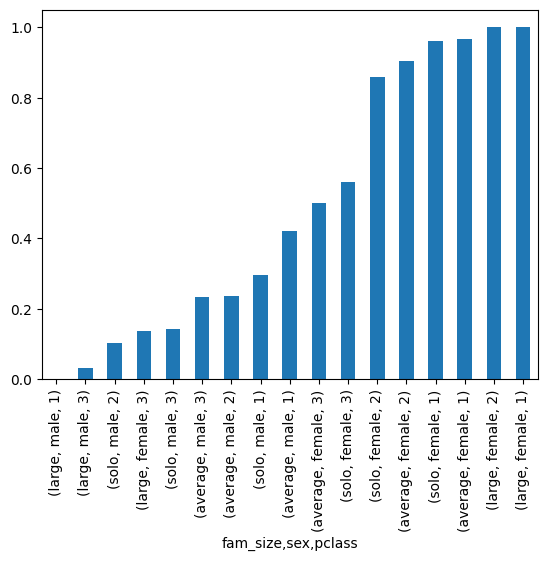

In [62]:
titanic.groupby(["fam_size", "sex", "pclass"]).survived.mean().sort_values().plot(kind="bar")

In [63]:
titanic["pclass"]

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [64]:
titanic["pclass"].map({1: "1st", 2: "2nd", 3: "3rd"})

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object

In [65]:
titanic["age"].map(lambda a: a < 18)

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [67]:
titanic[["name", "sex", "age_group"]].map(str.upper)

,name,sex,age_group
0,"ALLEN, MISS. ELISABETH WALTON",FEMALE,ADULT
1,"ALLISON, MASTER. HUDSON TREVOR",MALE,INFANT
2,"ALLISON, MISS. HELEN LORAINE",FEMALE,CHILD
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON",MALE,ADULT
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)",FEMALE,ADULT
...,...,...,...
1304,"ZABOUR, MISS. HILENI",FEMALE,TEEN
1305,"ZABOUR, MISS. THAMINE",FEMALE,SENIOR
1306,"ZAKARIAN, MR. MAPRIEDEDER",MALE,ADULT
1307,"ZAKARIAN, MR. ORTIN",MALE,ADULT


In [68]:
df

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500
...,...,...,...,...
1304,3,0,14.5000,14.4542
1305,3,0,NaN,14.4542
1306,3,0,26.5000,7.2250
1307,3,0,27.0000,7.2250


In [69]:
df.map(lambda el : el * 7)

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750


In [70]:
titanic[["name", "sex", "age_group"]].map(len)

,name,sex,age_group
0,29,6,5
1,30,4,6
2,28,6,5
3,36,4,5
4,47,6,5
...,...,...,...
1304,20,6,4
1305,21,6,6
1306,25,4,5
1307,19,4,5
